# Read in and plot data from Dharmawardena+2024

This notebook describes how to read the data in this repository. It also reproduces a few of the simple plots.

First we need some dependencies:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize, AsinhStretch
import cmasher as cmr

## Read in data

Now read in the data and check it. We start with the bounds because those are fast.

In [2]:
l_bounds = np.load('lbdGrid_l_bounds.pkl.npy', allow_pickle=True)
b_bounds = np.load('lbdGrid_b_bounds.pkl.npy', allow_pickle=True)
d_bounds = np.load('lbdGrid_d_bounds.pkl.npy', allow_pickle=True)

print(f"There are {l_bounds.shape} l bounds, from {l_bounds[0]} to {l_bounds[-1]}")
print(f"There are {b_bounds.shape} b bounds, from {b_bounds[0]} to {b_bounds[-1]}")
print(f"There are {d_bounds.shape} d bounds, from {d_bounds[0]} to {d_bounds[-1]}")

There are (881,) l bounds, from 0.0 to 360.0
There are (273,) b bounds, from -90.0 to 90.0
There are (1644,) d bounds, from 10.0 to 2790.461538461538


Now we can read in the density and its uncertainties.

In [3]:
density_median = np.load("Density_Median_lbd.pkl.npy", allow_pickle=True)
print(f"There are {density_median.shape} median densities")

density_16p = np.load("Density_16p_lbd.pkl.npy", allow_pickle=True)
print(f"There are {density_16p.shape} 16th percentiles")

density_84p = np.load("Density_84p_lbd.pkl.npy", allow_pickle=True)
print(f"There are {density_84p.shape} 84th percentiles")

There are (880, 272, 1644) median densities
There are (880, 272, 1644) 16th percentiles
There are (880, 272, 1644) 84th percentiles


And finally the extinctions

In [4]:
ext_median = np.load("Ext_Median_lbd.pkl.npy", allow_pickle=True)
print(f"There are {ext_median.shape} median extinctions")

ext_16p = np.load("Ext_16p_lbd.pkl.npy", allow_pickle=True)
print(f"There are {ext_16p.shape} 16th percentiles")

ext_84p = np.load("Ext_84p_lbd.pkl.npy", allow_pickle=True)
print(f"There are {ext_84p.shape} 84th percentiles")

There are (880, 272, 1644) median extinctions
There are (880, 272, 1644) 16th percentiles
There are (880, 272, 1644) 84th percentiles


You will notice that the shapes of the densities and the extinctions are the same. However, last density entry in the d-direction is all NaN and should not be used - this is because the extinctions are measured to the boundaries of the cells, while density is an estimate for the centre of the cell. If you want, you can remove the outer NaNs with:

In [5]:
density_median = density_median[..., :-1]
density_16p = density_16p[..., :-1]
density_84p = density_84p[..., :-1]

The size of the l and b axes of the data are shorter than the length of the boundaries. If you need to calculate the positions of the cells, you should calculate the mid points:

In [6]:
l_mids = (l_bounds[1:] + l_bounds[:-1]) / 2
b_mids = (b_bounds[1:] + b_bounds[:-1]) / 2
d_mids = (d_bounds[1:] + d_bounds[:-1]) / 2

We have also provided data that has been interpolated to heliocentric cartesian coordinates at 4pc steps - however in this case we only make the median density available. You can read those in as follows:

In [8]:
density_median_cart = np.load("Interpolated_Density_xyzGrid_4pcRes.pkl.npy", allow_pickle=True)
print(f"There are {density_median_cart.shape} median densities")

x_mids = np.load("Interpolated_xyzGrid_Xpoints.pkl.npy", allow_pickle=True)
print(f"There are {x_mids.shape} x mids")
y_mids = np.load("Interpolated_xyzGrid_Ypoints.pkl.npy", allow_pickle=True)
print(f"There are {y_mids.shape} y mids")
z_mids = np.load("Interpolated_xyzGrid_Zpoints.pkl.npy", allow_pickle=True)
print(f"There are {z_mids.shape} z mids")

There are (1395, 1395, 1395) median densities
There are (1395,) x mids
There are (1395,) y mids
There are (1395,) z mids


## Some basic plots

If you want to see the extinction along a line of sight, you can extract it as follows:

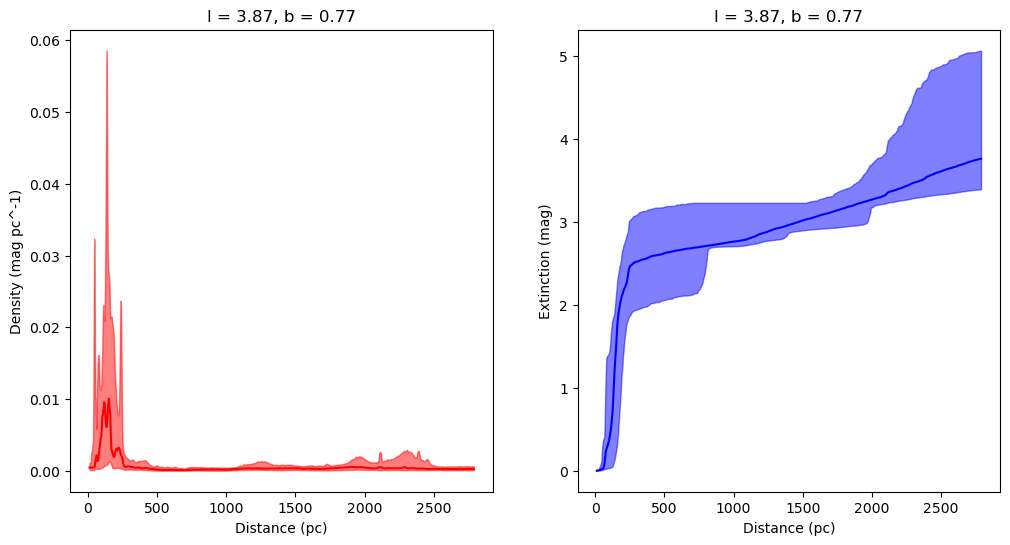

In [7]:
# Define some l, b of interest:
l = 3.87
b = 0.77

# Two ways of finding the indices of the l, b of interest:
# One: Find the index of the closest l, b to the desired l, b
l_idx = np.argmin(np.abs(l_mids - l))
b_idx = np.argmin(np.abs(b_mids - b))

# Two: find the index of the last bound that is less than the desired l, b
l_idx = np.where(l_bounds < l)[0][-1]
b_idx = np.where(b_bounds < b)[0][-1]

# Now we can plot the density and extinction at this l, b
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].fill_between(d_mids, density_16p[l_idx, b_idx], density_84p[l_idx, b_idx], alpha=0.5, color='r')
ax[0].plot(d_mids, density_median[l_idx, b_idx], color='r')
ax[0].set_xlabel("Distance (pc)")
ax[0].set_ylabel("Density (mag pc^-1)")
ax[0].set_title(f"l = {l}, b = {b}")

ax[1].fill_between(d_bounds, ext_16p[l_idx, b_idx], ext_84p[l_idx, b_idx], alpha=0.5, color='b')
ax[1].plot(d_bounds, ext_median[l_idx, b_idx], color='b')
ax[1].set_xlabel("Distance (pc)")
ax[1].set_ylabel("Extinction (mag)")
ax[1].set_title(f"l = {l}, b = {b}")

plt.show()

If you want to examine the density at z=0, you can plot that from either the original data (in Galactic coordinates) or the interpolated cartesian data. For ease, we will demonstrate this with the cartesian data.

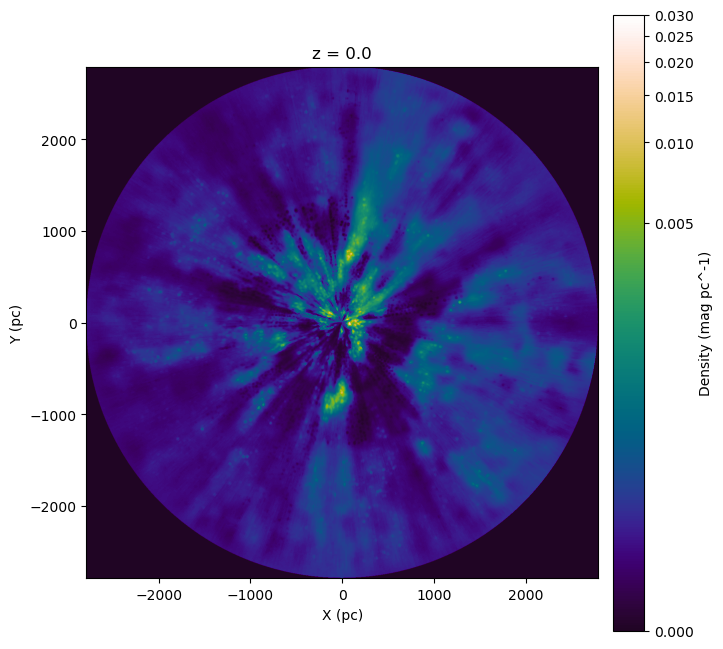

In [17]:
z_ind = np.argmin(np.abs(z_mids - 0))

colmap = cmr.get_sub_cmap("cmr.rainforest", 0.1, 1) #0.08
normalize = ImageNormalize(density_median_cart[:, :, z_ind], vmin=0, vmax=0.03, stretch=AsinhStretch(a=0.01)) #vmin=0, vmax=np.nanmax(interp_image)#vmin=0.0001, vmax=0.085. #, stretch=AsinhStretch(a=0.01). #vmin=0, vmax=0.01

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(density_median_cart[:, :, z_ind], origin='lower', extent=(x_mids[0], x_mids[-1], y_mids[0], y_mids[-1]),
          cmap=colmap, norm=normalize)
ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")
ax.set_title(f"z = {z_mids[z_ind]}")
ax.set_aspect("equal", "box")
plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=colmap), ax=ax, label="Density (mag pc^-1)", pad=0.025)

plt.show()

You may also want to look at the density integrated over some range, for example over the Galactic plane. For this, it is a lot easier to work with the cartesian data:

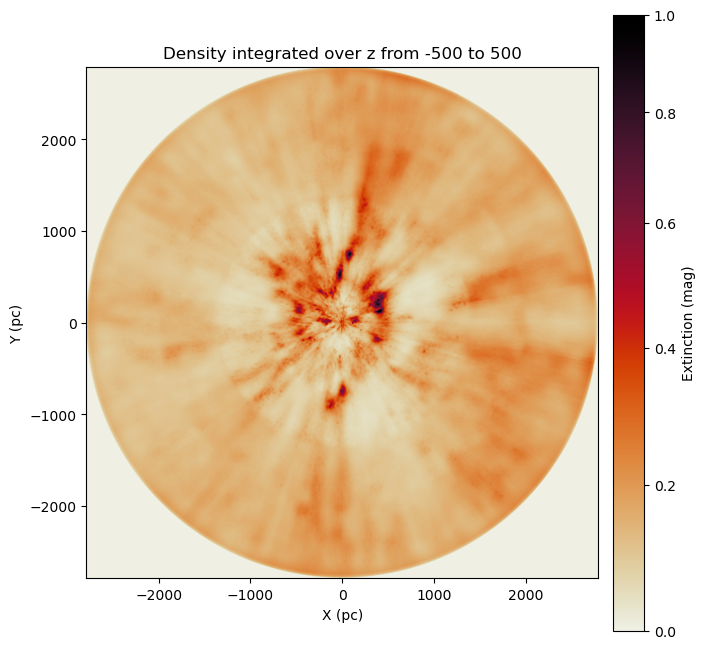

In [21]:
z_min = -500
z_max = 500

z_min_idx = np.argmin(np.abs(z_mids - z_min))
z_max_idx = np.argmin(np.abs(z_mids - z_max))

# Now integrate the density along the z axis
density_integrated = np.trapz(density_median_cart[:, :, z_min_idx:z_max_idx], z_mids[z_min_idx:z_max_idx], axis=-1)

colmap = cmr.get_sub_cmap("cmr.sunburst_r", 0.05, 1) #0.08
normalize = ImageNormalize(density_integrated, vmin=0, vmax=1, stretch=AsinhStretch(a=0.8)) #vmax=1.5 #vmin=0, vmax=np.nanmax(interp_image)#vmin=0.0001, vmax=0.085. #, stretch=AsinhStretch(a=0.01). #vmin=0, vmax=0.01

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(density_integrated, origin='lower', extent=(x_mids[0], x_mids[-1], y_mids[0], y_mids[-1]),
          cmap=colmap, norm=normalize)
ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")
ax.set_title(f"Density integrated over z from {z_min} to {z_max}")

plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=colmap), ax=ax, label="Extinction (mag)", pad=0.025)

plt.show()